# Homework 7, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [1]:
import pandas as pd
import numpy as np

## Read in the file `craftcans.csv`, and look at the first first rows

In [2]:
df = pd.read_csv("craftcans.csv", na_values=["Does not apply", 0])



In [3]:
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25.0


## How many rows do you have in the data? What are the column types?

In [4]:
df.dtypes #Dtype of columns = objects/strings

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV          object
IBUs        float64
dtype: object

In [5]:
df.shape #2416 rows

(2416, 7)

# Checking out our alcohol

## What are the top 10 producers in terms of different cans of beer?

In [6]:
df["Style"].value_counts().sort_values(ascending=False).head(10)  #Checking the values of style to get an idea

Style
American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
American Pale Wheat Ale            97
American Brown Ale                 70
American Porter                    68
Saison / Farmhouse Ale             52
Witbier                            51
Name: count, dtype: int64

In [7]:
# df.groupby("Style")["Brewery"].value_counts().sort_values(ascending=False).head(10)

In [8]:
df.groupby("Style").Brewery.value_counts().sort_values(ascending=False).head(10)  #omg, i've been doing this wrong til now

Style                           Brewery                   
American Pale Ale (APA)         Oskar Blues Brewery           14
American Pale Wheat Ale         Hopworks Urban Brewery        12
American IPA                    Cigar City Brewing Company    10
                                Golden Road Brewing            9
American Double / Imperial IPA  Oskar Blues Brewery            9
Belgian IPA                     Brewery Vivant                 8
Saison / Farmhouse Ale          Brewery Vivant                 7
Belgian Dark Ale                Brewery Vivant                 7
American Adjunct Lager          Stevens Point Brewery          7
American IPA                    Sun King Brewing Company       6
Name: count, dtype: int64

## What is the most common ABV? (alcohol by volume)

In [9]:
df.ABV.value_counts().sort_values(ascending=False).head(1)

ABV
5.00%    215
Name: count, dtype: int64

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [10]:
df.ABV

0       4.50%
1       4.90%
2       4.80%
3       6.00%
4       6.00%
        ...  
2411    5.30%
2412    9.90%
2413    8.00%
2414    8.70%
2415    6.50%
Name: ABV, Length: 2416, dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.*
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [11]:
df.ABV.str.replace("%", " ")

0       4.50 
1       4.90 
2       4.80 
3       6.00 
4       6.00 
        ...  
2411    5.30 
2412    9.90 
2413    8.00 
2414    8.70 
2415    6.50 
Name: ABV, Length: 2416, dtype: object

In [12]:
df.ABV = df.ABV.str.replace("%", " ")       #updating the df so I can continue next steps

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [13]:
df.ABV = df.ABV.astype(float)

In [14]:
df.dtypes #it worked!

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV         float64
IBUs        float64
dtype: object

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [15]:
df.groupby("Beer").ABV.mean()

Beer
#001 Golden Amber Lager                   5.5
#002 American I.P.A.                      7.1
#003 Brown & Robust Porter                5.2
#004 Session I.P.A.                       4.8
#9                                        5.1
                                         ... 
Zen                                       4.3
Zombie Monkie                             6.2
Zonker Stout                              5.4
oSKAr the G'Rauch                         8.5
the Kimmie, the Yink and the Holy Gose    4.8
Name: ABV, Length: 2306, dtype: float64

In [16]:
df.groupby("Beer").ABV.median()

Beer
#001 Golden Amber Lager                   5.5
#002 American I.P.A.                      7.1
#003 Brown & Robust Porter                5.2
#004 Session I.P.A.                       4.8
#9                                        5.1
                                         ... 
Zen                                       4.3
Zombie Monkie                             6.2
Zonker Stout                              5.4
oSKAr the G'Rauch                         8.5
the Kimmie, the Yink and the Holy Gose    4.8
Name: ABV, Length: 2306, dtype: float64

In [17]:
df.groupby("Beer").ABV.value_counts().median()  #The median ABV of all beers????

1.0

<Axes: >

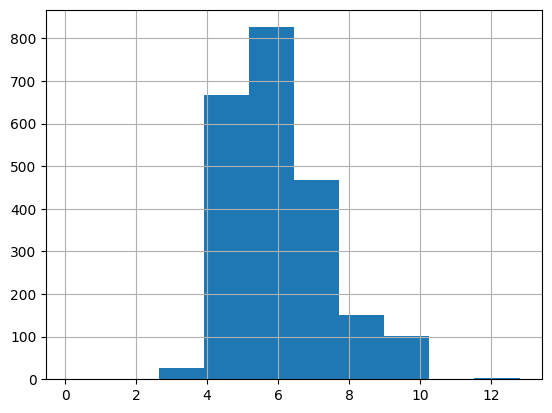

In [18]:
df.groupby("Beer").ABV.median().hist()      #Seems some beers don't have ABV info

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: What does `.sum()` do when you have trues and falses? What about `.value_counts()`?*

In [19]:
df.ABV.isnull().value_counts()

ABV
False    2348
True       68
Name: count, dtype: int64

In [20]:
df.ABV.notnull().sum()    #.sum and .value_counts do the same thing 

2348

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [21]:
df.Location.value_counts().sort_values(ascending=False).head(10)

Location
Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: count, dtype: int64

## List all of the beer from Brooklyn, NY

In [22]:
df[df.Location == "Brooklyn, NY"]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,NaN
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62.0
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50.0
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111.0
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.7,19.0


## What brewery in Brooklyn puts out the most different cans of beer?

In [23]:
df[df.Location == "Brooklyn, NY"].groupby("Brewery").Beer.value_counts().head()

Brewery           Beer                      
Brooklyn Brewery  East India Pale Ale           2
                  Brooklyn Lager (12 oz.)       1
                  Brooklyn Lager (16 oz.)       1
                  Brooklyn Summer Ale           1
                  Brooklyn Summer Ale (2011)    1
Name: count, dtype: int64

## What are the five most common styles of beer produced by Sixpoint?

In [24]:
df[df["Brewery"] == "Sixpoint Craft Ales"].Style.value_counts().sort_values(ascending=False).head(5)

Style
American IPA                      4
Baltic Porter                     2
American Double / Imperial IPA    2
German Pilsener                   2
Cream Ale                         2
Name: count, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*
- *Tip: If you want to be extra fancy, you can create a new column with just the state abbreviation and then filter on that.*

In [25]:
df["State"] = df["Location"].str[-2:]
df.head()

                                     

,Beer,Brewery,Location,Style,Size,ABV,IBUs,State
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50.0,MN
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.9,26.0,MN
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19.0,MN
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.0,38.0,MN
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.0,25.0,MN


In [26]:
df[df["State"] == "NY"]

,Beer,Brewery,Location,Style,Size,ABV,IBUs,State
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0,NY
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0,NY
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN,NY
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN,NY
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0,NY
...,...,...,...,...,...,...,...,...
2351,Brooklyn Lager (12 oz.),Brooklyn Brewery,"Brooklyn, NY",American Amber / Red Lager,12 oz.,5.2,NaN,NY
2364,Heinnieweisse Weissebier,Butternuts Beer and Ale,"Garrattsville, NY",Hefeweizen,12 oz.,4.9,NaN,NY
2365,Snapperhead IPA,Butternuts Beer and Ale,"Garrattsville, NY",American IPA,12 oz.,6.8,NaN,NY
2366,Moo Thunder Stout,Butternuts Beer and Ale,"Garrattsville, NY",Milk / Sweet Stout,12 oz.,4.9,NaN,NY


### Now *count* all of the breweries in New York state

In [27]:
df[df["State"] == "NY"].value_counts() #73

Beer                              Brewery                     Location       Style                                Size               ABV   IBUs   State
3Beans                            Sixpoint Craft Ales         Brooklyn, NY   Baltic Porter                        12 oz.             9.9   85.0   NY       1
Our Legacy IPA                    Matt Brewing Company        Utica, NY      American IPA                         16 oz.             6.5   60.0   NY       1
Harbinger                         Sixpoint Craft Ales         Brooklyn, NY   Saison / Farmhouse Ale               16 oz.             4.9   35.0   NY       1
Hi-Res                            Sixpoint Craft Ales         Brooklyn, NY   American Double / Imperial IPA       12 oz.             9.9   111.0  NY       1
Jammer                            Sixpoint Craft Ales         Brooklyn, NY   Gose                                 12 oz. Slimline    4.2   16.0   NY       1
KelSo India Pale Ale              KelSo Beer Company          B

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [28]:
df["Style_clean"] = df["Style"].dropna()    #Still getting NaNs

In [29]:
df[df["Style_clean"].str.contains("IPA", na=False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs,State,Style_clean
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50.0,MN,American IPA
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0,KY,American Double / Imperial IPA
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0,KY,American Double / Imperial IPA
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0,KY,American IPA
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0,CA,American Double / Imperial IPA
...,...,...,...,...,...,...,...,...,...
2403,Abrasive Ale,Surly Brewing Company,"Brooklyn Center, MN",American Double / Imperial IPA,16 oz.,9.7,120.0,MN,American Double / Imperial IPA
2406,Furious,Surly Brewing Company,"Brooklyn Center, MN",American IPA,16 oz.,6.2,99.0,MN,American IPA
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65.0,CA,American IPA
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100.0,CO,American Double / Imperial IPA


IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [30]:
df.groupby("Beer").IBUs.mean()

Beer
#001 Golden Amber Lager                    NaN
#002 American I.P.A.                      60.0
#003 Brown & Robust Porter                 NaN
#004 Session I.P.A.                       38.0
#9                                        20.0
                                          ... 
Zen                                       45.0
Zombie Monkie                             35.0
Zonker Stout                              36.0
oSKAr the G'Rauch                          NaN
the Kimmie, the Yink and the Holy Gose     NaN
Name: IBUs, Length: 2306, dtype: float64

In [31]:
df.IBUs.describe

<bound method NDFrame.describe of 0        50.0
1        26.0
2        19.0
3        38.0
4        25.0
        ...  
2411     35.0
2412    100.0
2413     35.0
2414     85.0
2415     65.0
Name: IBUs, Length: 2416, dtype: float64>

In [32]:
df.IBUs.astype(float)

0        50.0
1        26.0
2        19.0
3        38.0
4        25.0
        ...  
2411     35.0
2412    100.0
2413     35.0
2414     85.0
2415     65.0
Name: IBUs, Length: 2416, dtype: float64

In [33]:
df.IBUs.value_counts()

IBUs
20.0     82
35.0     60
65.0     54
30.0     53
70.0     48
         ..
111.0     1
89.0      1
108.0     1
118.0     1
113.0     1
Name: count, Length: 107, dtype: int64

In [34]:
df.IBUs.fillna(0)

0        50.0
1        26.0
2        19.0
3        38.0
4        25.0
        ...  
2411     35.0
2412    100.0
2413     35.0
2414     85.0
2415     65.0
Name: IBUs, Length: 2416, dtype: float64

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

- *Tip: If you use [`na_values=`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). be sure to go add it up top and run all of your cells again. You can also use `.replace` but I don't think that's as good of an idea.*
- *Tip: Make sure you're giving `na_values=` a LIST, not just a string*

### Now try to get the average IBUs again

In [35]:
df["IBUs"].value_counts()

IBUs
20.0     82
35.0     60
65.0     54
30.0     53
70.0     48
         ..
111.0     1
89.0      1
108.0     1
118.0     1
113.0     1
Name: count, Length: 107, dtype: int64

In [36]:
df[df["IBUs"] == "Does not apply"]  #Getting no results after re running the kernel

,Beer,Brewery,Location,Style,Size,ABV,IBUs,State,Style_clean


In [37]:
df["IBUs"].mean()  #VoilÀ

42.71316725978647

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*

<Axes: >

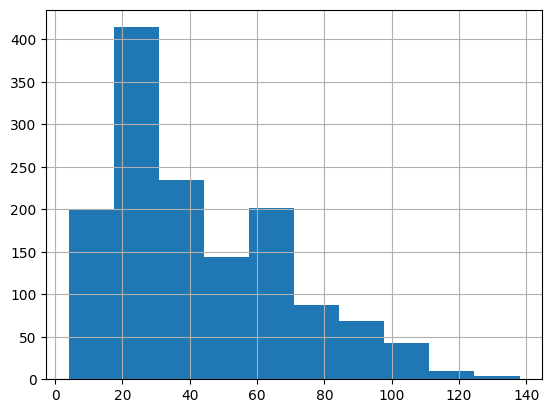

In [38]:
df["IBUs"].hist()

<Axes: >

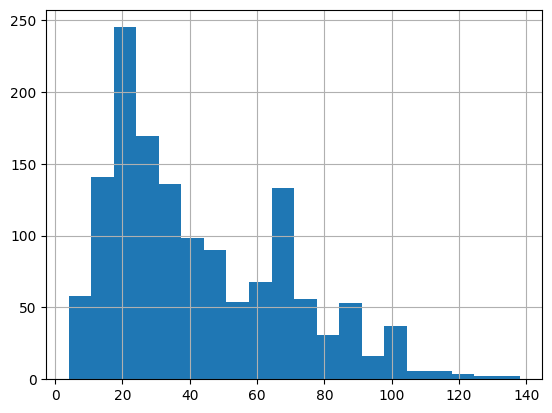

In [39]:
df["IBUs"].hist(bins=20)  #with 20bins

In [40]:
df.IBUs.value_counts()

IBUs
20.0     82
35.0     60
65.0     54
30.0     53
70.0     48
         ..
111.0     1
89.0      1
108.0     1
118.0     1
113.0     1
Name: count, Length: 107, dtype: int64

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single command that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [41]:
# df.groupby("Beer").IBUs.quantile([0.75])

In [42]:
df.IBUs.describe()

count    1405.000000
mean       42.713167
std        25.954066
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: IBUs, dtype: float64

In [43]:
df[df["IBUs"] > 64]

,Beer,Brewery,Location,Style,Size,ABV,IBUs,State,Style_clean
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0,KY,American Double / Imperial IPA
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.5,80.0,KY,English Barleywine
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0,KY,American Double / Imperial IPA
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0,KY,American IPA
21,Excess IPL,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,16 oz.,7.2,80.0,MA,American India Pale Lager
...,...,...,...,...,...,...,...,...,...
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65.0,CA,American IPA
2410,Ten Fidy Imperial Stout,Oskar Blues Brewery,"Longmont, CO",Russian Imperial Stout,12 oz.,9.9,98.0,CO,Russian Imperial Stout
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100.0,CO,American Double / Imperial IPA
2414,Gordon Ale (2009),Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,8.7,85.0,CO,American Double / Imperial IPA


## List all of the beers with IBUs below the 25th percentile

In [44]:
df[df["IBUs"] < 21]

,Beer,Brewery,Location,Style,Size,ABV,IBUs,State,Style_clean
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19.0,MN,English Brown Ale
12,Sho'nuff,Against the Grain Brewery,"Louisville, KY",Belgian Pale Ale,16 oz.,4.0,13.0,KY,Belgian Pale Ale
13,Bloody Show,Against the Grain Brewery,"Louisville, KY",American Pilsner,16 oz.,5.5,17.0,KY,American Pilsner
18,The Brown Note,Against the Grain Brewery,"Louisville, KY",English Brown Ale,16 oz.,5.0,20.0,KY,English Brown Ale
19,House Lager,Jack's Abby Craft Lagers,"Framingham, MA",Keller Bier / Zwickel Bier,16 oz.,5.2,18.0,MA,Keller Bier / Zwickel Bier
...,...,...,...,...,...,...,...,...,...
2372,Bombshell Blonde,Southern Star Brewing Company,"Conroe, TX",American Blonde Ale,12 oz.,5.0,20.0,TX,American Blonde Ale
2385,Bikini Blonde Lager,Maui Brewing Company,"Lahaina, HI",Munich Helles Lager,12 oz.,4.5,18.0,HI,Munich Helles Lager
2396,Royal Weisse Ale,Sly Fox Brewing Company,"Pottstown, PA",Hefeweizen,12 oz.,5.6,11.0,PA,Hefeweizen
2404,Hell,Surly Brewing Company,"Brooklyn Center, MN",Keller Bier / Zwickel Bier,16 oz.,5.1,20.0,MN,Keller Bier / Zwickel Bier


## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

In [45]:
 # df.groupby("Style").IBUs.quantile([0.50]).sort_values(ascending=False).plot.barh()     #suspicious

<Axes: ylabel='Style'>

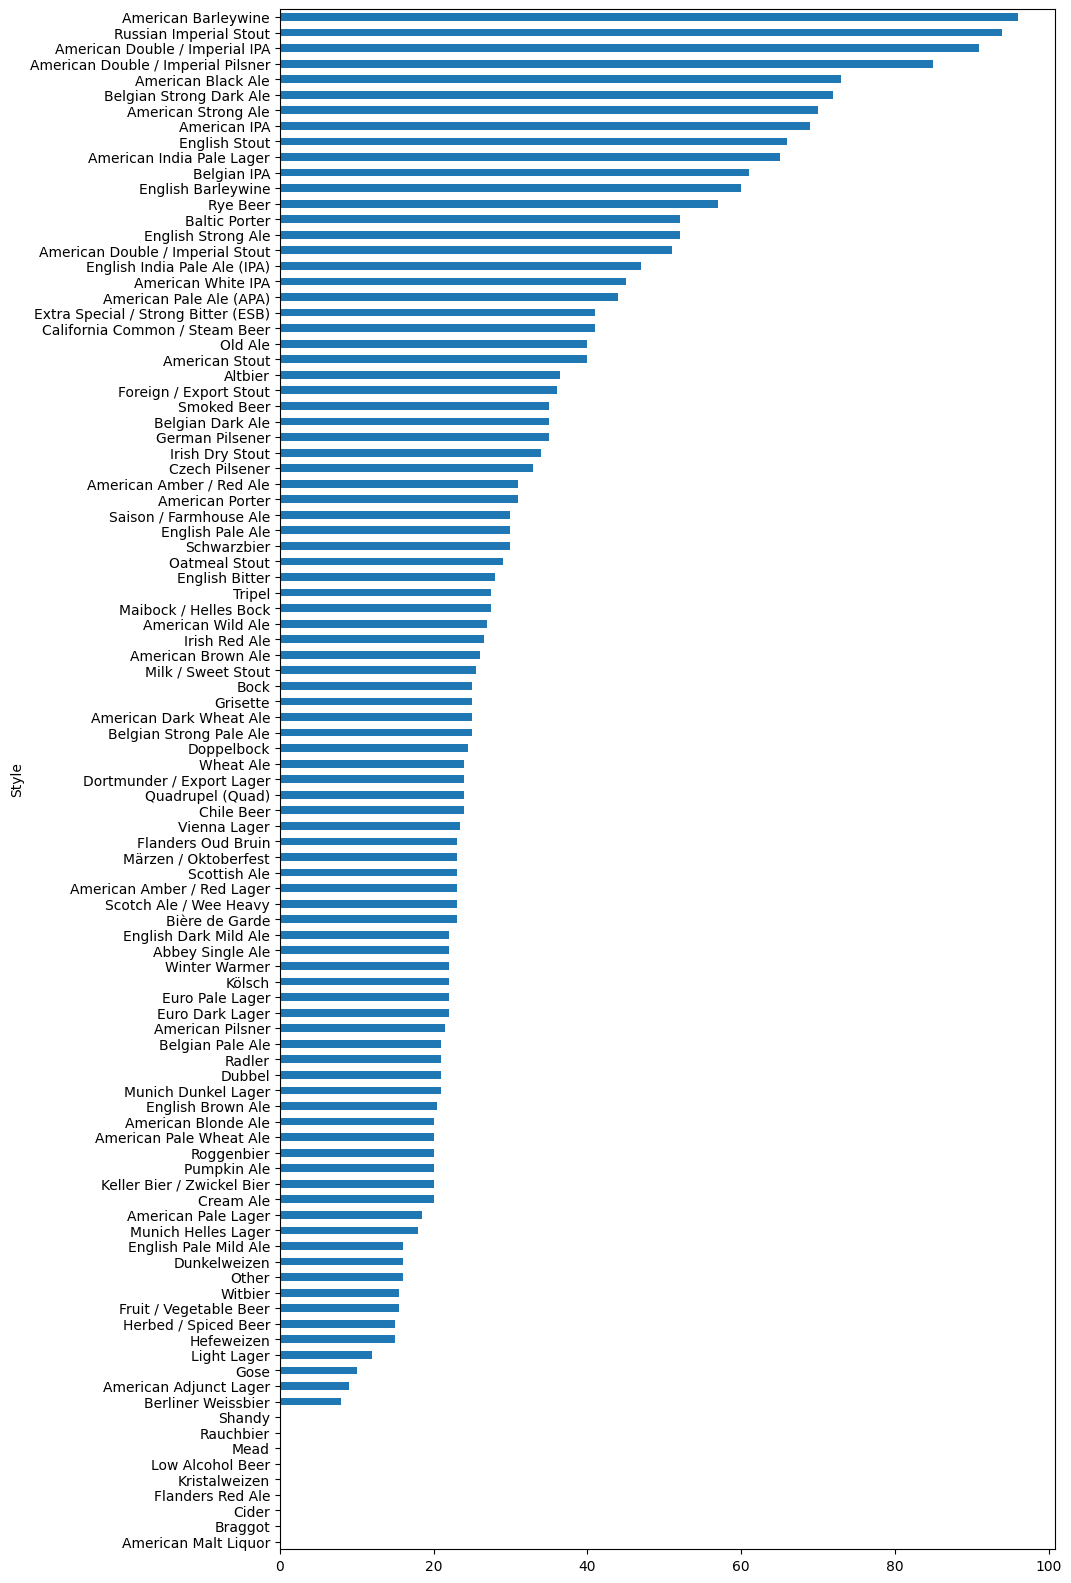

In [46]:
 df.groupby("Style").IBUs.median().sort_values(ascending=True, na_position="first").plot.barh(figsize=(10,20))

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [47]:
df[df["IBUs"] > 64].Style.value_counts().sort_values(ascending=False).head()

Style
American IPA                      195
American Double / Imperial IPA     72
American Pale Ale (APA)            18
American Black Ale                 15
American Strong Ale                 9
Name: count, dtype: int64

In [48]:
df[df["IBUs"] < 21].Style.value_counts().sort_values(ascending=False).head()

Style
American Pale Wheat Ale    43
American Blonde Ale        36
Fruit / Vegetable Beer     28
Hefeweizen                 21
Witbier                    20
Name: count, dtype: int64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [49]:
# df[df.Style].isin(["Witbier", "Hefeweizen", "American Pale Wheat Ale"]) #not working bc loc is missing

In [50]:
df.loc[df['Style'].isin(["Witbier", "Hefeweizen", "American Pale Wheat Ale"])].IBUs.mean()

18.982142857142858

## Draw a histogram of the IBUs of those beers

<Axes: >

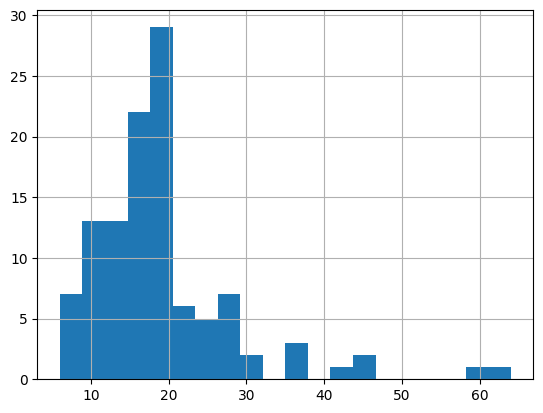

In [51]:
df.loc[df['Style'].isin(["Witbier", "Hefeweizen", "American Pale Wheat Ale"])].IBUs.hist(bins=20)

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [52]:
df.loc[df['Style'].str.contains("IPA", na=False)].IBUs.mean()

71.94897959183673

<Axes: >

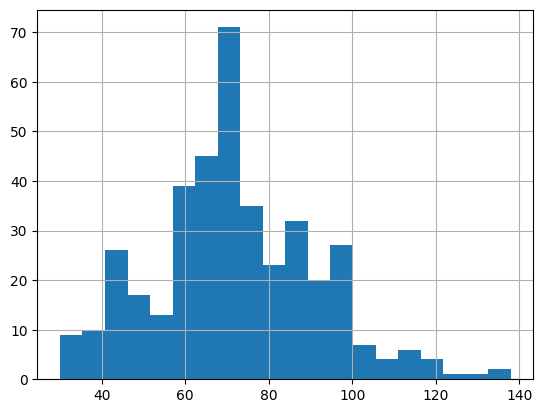

In [53]:
df.loc[df['Style'].str.contains("IPA", na=False)].IBUs.hist(bins=20)

## Plot those two histograms in the same cell!

I swear the behavior of this changes every year. Does it make two charts? Does it overlap them in one?

<Axes: >

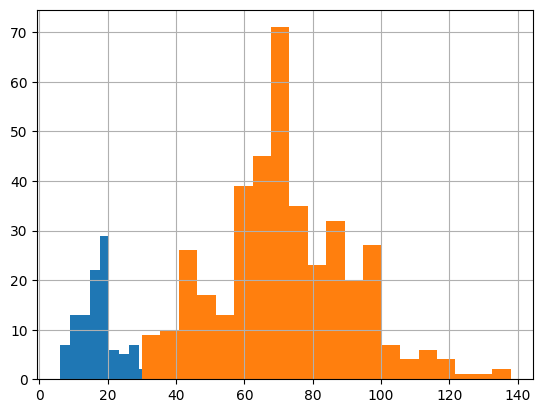

In [54]:
df.loc[df['Style'].isin(["Witbier", "Hefeweizen", "American Pale Wheat Ale"])].IBUs.hist(bins=20)
df.loc[df['Style'].str.contains("IPA", na=False)].IBUs.hist(bins=20)

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

<Axes: >

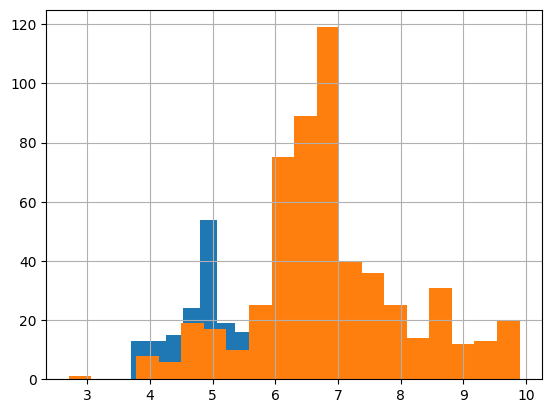

In [55]:
df.loc[df['Style'].isin(["Witbier", "Hefeweizen", "American Pale Wheat Ale"])].ABV.hist(bins=20)
df.loc[df['Style'].str.contains("IPA", na=False)].ABV.hist(bins=20)

## Good work!

In [56]:
# :')